## Importing Libraries

In [31]:
%load_ext autoreload
%autoreload 2
# lib and settings for interactive plots
interactive_figures = False
if interactive_figures:
    # Normal behavior
    %matplotlib widget
    figsize=(9, 3)
else:
    # PDF export behavior
    figsize=(14, 4)
    # figsize=(5, 4)
import matplotlib.pyplot as plt

import numpy as np
import math
import pandas as pd
from tensorflow import keras
import tensorflow_probability as tfp
from tensorflow.keras import layers
import keras.callbacks

from itertools import product
import os
base_folder = os.path.join(os.getcwd(), '..')

from pathlib import Path

# i think i have modified also the docker files :(
! pip install tqdm
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


## Function Definitions

In [33]:
def closed_form_method(theta, mu, sigma, delta_t, x0=1, N=1000):
    # TODO: check parameter mu
    X = np.zeros(N)
    X[0] = x0
    W = np.random.normal(0, 1, size=N)
    W[0] = 0
    for i in range(N-1):
        X[i+1] = X[i] + theta*(mu - X[i])*delta_t + sigma*W[i]*X[i]*np.sqrt(delta_t) + 0.5*(sigma**2)*X[i]*delta_t*(W[i]**2 - 1)
    return X

In [34]:
def plot_grid_datapoints(grid, params, run=0, sigma=0.5, theta=0.1, mu=1, delta=0.2, variation=None, num_run=10):
    assert run in range(params['run'])
    assert variation in list(params.keys())+[None]
    sigma = params['sigma'].index(sigma)
    theta = params['theta'].index(theta)
    mu = params['mu'].index(mu)
    delta = params['delta'].index(delta)
    plt.figure(figsize=figsize)
    if variation is None:
        Xs = grid[run, sigma, theta, delta, :]
        plt.plot(Xs)
    else:
        if variation == 'theta':
            Xs = grid[run, sigma, :, mu, delta, :]
        elif variation == 'sigma':
            Xs = grid[run, :, theta, mu, delta, :]
        elif variation == 'mu':
            Xs = grid[run, sigma, theta, :, delta, :]
        elif variation == 'delta':
            Xs = grid[run, sigma, theta, :, mu, :]
        elif variation == 'run':
            Xs = grid[:num_run, sigma, theta, mu, delta, :]
        labels = [variation+' = '+str(p) for p in params[variation]]
        for X, l in zip(Xs, labels):
            plt.plot(X, label = l)
    plt.xlabel('t')
    plt.ylabel('X(t)')
    plt.legend()
    plt.show()

def plot_bidimensional_datapoints(array, params, name):
    params = params[name]
    labels = [name+' = '+str(p) for p in params]
    plt.figure(figsize=figsize)
    for data,label in zip(array,labels):
        plt.plot(data,label=label)
    plt.xlabel('t')
    plt.ylabel('X(t)')
    plt.legend()
    plt.show()

## Parameter grid

In [35]:
grid_path = os.path.join(base_folder, 'Data', 'grid')
params = {
        'run': 30,
        'sigma': [0.3, 0.4, 0.5, 0.6],
        'theta': [0.01, 0.1, 0.5, 3],
        'mu': [0.8, 0.9, 1, 1.1],
        'delta': [0.01,0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
        'N': 1000
    }
if not(Path(grid_path+'.npy').is_file()):
    grid = np.zeros((params['run'], 
                    len(params['sigma']),
                    len(params['theta']),
                    len(params['mu']),
                    len(params['delta']),
                    params['N']))
    for r in tqdm(range(params['run'])):
        for s, t, d, m in product(params['sigma'], params['theta'],params['delta'], params['mu']):
            # TODO: just in case add also mu 
            si = params['sigma'].index(s)
            ti = params['theta'].index(t)
            di = params['delta'].index(d)
            mi = params['mu'].index(m)
            grid[r,si,ti,mi,di,:] = closed_form_method(t,m,s,d)
    # store grid data
    np.save(grid_path, grid, allow_pickle=True)
grid = np.load(grid_path+'.npy', allow_pickle=True)

100%|██████████| 30/30 [06:24<00:00, 12.83s/it]


## first run varying sigma paramether and other paramether setted by default

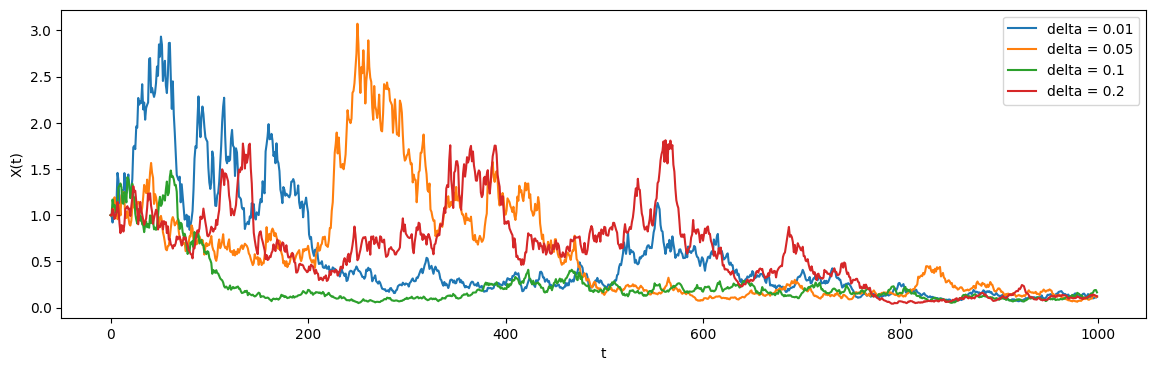

In [36]:
'''
{
        'run': 30,
        'sigma': [0.3, 0.4, 0.5, 0.6],
        'theta': [0.01, 0.1, 0.5, 3],
        'mu': [0.8, 0.9, 1, 1.1],
        'delta': [0.01,0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
        'N': 1000
    }
'''
# CHOOCE IF USING plot_bidimensional_datapoints OR plot_grid_datapoints
# defaults run=0, sigma=0.5,theta=0.1, delta=0.2, mu=1
# plot_bidimensional_datapoints(array=grid[1,:,1,3,:], params=params, name='sigma')
plot_grid_datapoints(grid, params, run=2, sigma=0.3, theta=0.01, mu=1, variation='delta')

In [ ]:
def method_formula

def method_percentile
    return array(30,4,4,4,10,1000)

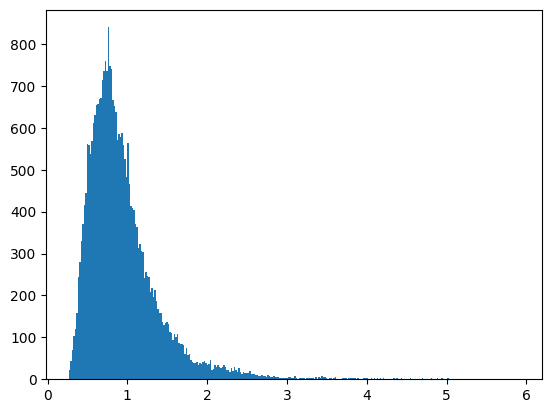

In [46]:
'''
{
        'run': 30,
        'sigma': [0.3, 0.4, 0.5, 0.6],
        'theta': [0.01, 0.1, 0.5, 3],
        'mu': [0.8, 0.9, 1, 1.1],
        'delta': [0.01,0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
        'N': 1000
    }
'''

grid[:,0,0,0,2,:].flatten().sort[0.9*30*1000]
kde(grid[:,0,0,0,2,:].flatten()).std
kde(grid[:,0,0,0,2,:].flatten()).mean
plt.hist(grid[:,2,2,2,0,:].flatten(), bins=300);

## mean and dev std

In [8]:
# media su run
np.mean(grid, axis=0).shape
np.std(grid, axis=0).shape

(4, 4, 10, 1000)

In [9]:
# media su istanti temporali
np.mean(grid, axis=-1).shape
np.std(grid, axis=-1).shape

(30, 4, 4, 10)

In [10]:
#global_mean = np.mean(np.mean(grid, axis=0), axis=-1)
#global_std = np.std(np.std(grid, axis=0), axis=-1)

global_mean = np.mean(grid, axis=-1)
global_std = np.std(grid, axis=-1)

#global_mean = np.mean(grid, axis=0)
#global_std = np.std(grid,axis=0)
global_std.shape

(30, 4, 4, 10)

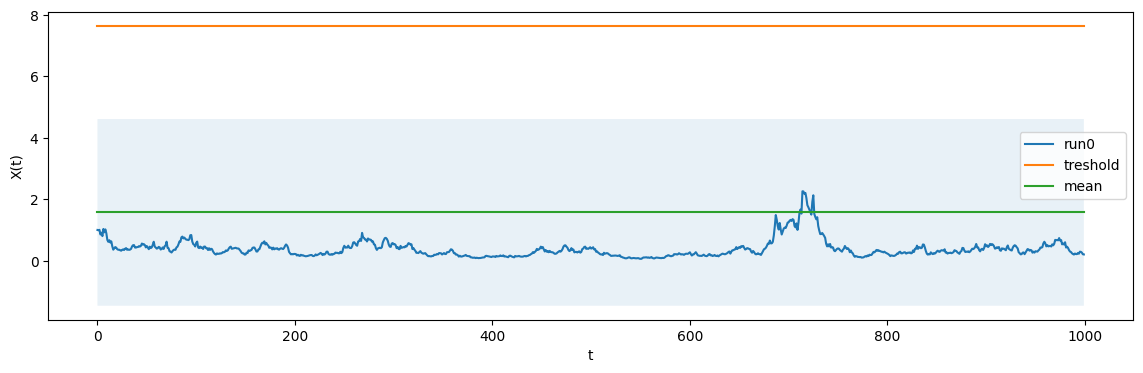

In [18]:
plt.figure(figsize=figsize)
plt.plot(grid[0,0,0,3,:], label='run0')
alpha = 2
#alpha = 1
run = 6
plt.plot([global_mean[run,0,0,3]+alpha*global_std[run,0,0,3] for _ in range(params['N'])] , label='treshold')
plt.plot([global_mean[run,0,0,3] for _ in range(params['N'])] , label='mean')
plt.fill_between(list(range(params['N']))
        ,[global_mean[run,0,0,3]+global_std[run,0,0,3] for _ in range(params['N'])],
         [global_mean[run,0,0,3]-global_std[run,0,0,3] for _ in range(params['N'])], alpha=0.1)
'''
plt.plot(global_mean[0,0,3,:]+alpha*global_std[0,0,3,:] , label='treshold')
plt.plot(global_mean[0,0,3,:], label='mean')
plt.fill_between(list(range(params['N']))
        ,global_mean[0,0,3,:]+global_std[0,0,3,:],
         global_mean[0,0,3,:]-global_std[0,0,3,:], alpha=0.1)
'''
plt.xlabel('t')
plt.ylabel('X(t)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


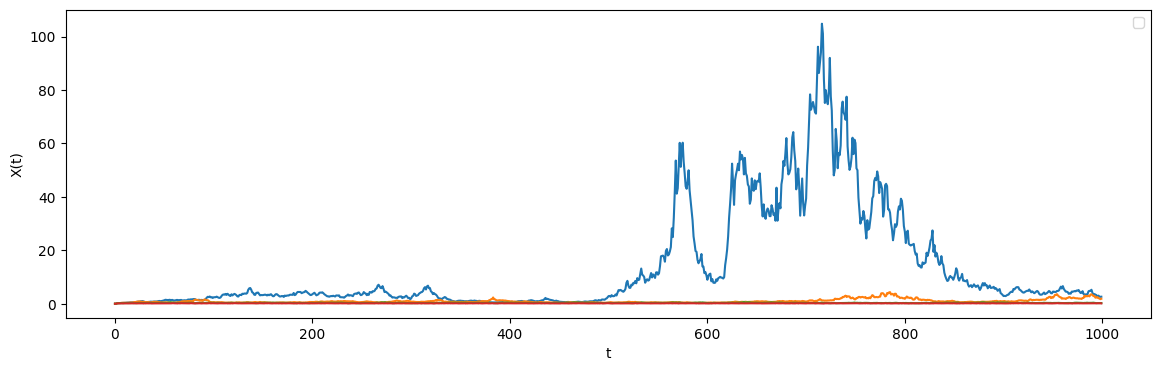

In [78]:
# np.mean(grid, axis=0)[0,0,:]
plt.figure(figsize=figsize)
plt.plot(np.std(grid, axis=0)[0,0,3,:])
plt.plot(np.std(grid, axis=0)[0,1,3,:])
plt.plot(np.std(grid, axis=0)[0,2,3,:])
plt.plot(np.std(grid, axis=0)[0,3,3,:])
plt.xlabel('t')
plt.ylabel('X(t)')
plt.legend()
plt.show()

L'istante di tempo non ci dice nulla sullo spike, ma ce lo dovrebbe dire l'istante precedente allo spike.

Se iniziano a crescere probabilmente c'è lo spike

In [31]:
length = 1000
x = np.arange(length)
y = np.ones_like(x)
start = length//2-1+length%2
np.all(np.convolve(x,y)[start:start+length] == np.convolve(x,y,'same'))

True

<class 'numpy.ndarray'>
(301,)
(301,)


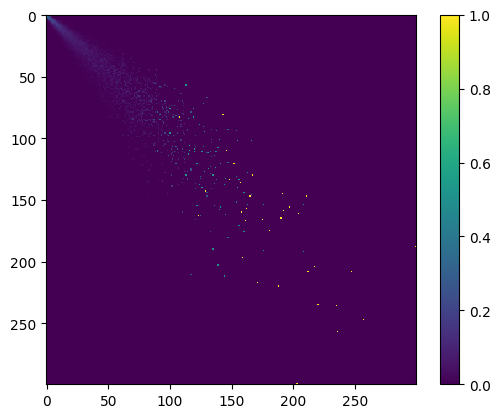

In [83]:
#sigma 0-3,theta 0-3, delta 0-9
A = grid[:,0,1,7,:]
actual_df = pd.DataFrame(A[:,:params['N']-1].flatten(), columns=['Actual_value'])
next_df = pd.DataFrame(A[:,1:].flatten(), columns=['Next_value'])
actual_next_df = pd.concat([actual_df, next_df], axis=1)
# h, xedges, yedges, _ = plt.hist2d(actual_next_df.Actual_value, actual_next_df.Next_value, bins=(300, 300), cmap=plt.cm.jet)
h, xedges, y_edges = np.histogram2d(actual_next_df.Actual_value, actual_next_df.Next_value, bins=(300, 300))
#plt.colorbar()
#plt.show()
#plt.imshow(h, interpolation='none')
#plt.show()
print(type(h))
print(xedges.shape)
print(yedges.shape)
denominator = h.sum(axis=0)
denominator[denominator==0] = 1
h = h / denominator
plt.imshow(h, interpolation='none')
plt.colorbar()
plt.show()

#the more delta increases the more the ouput value around 0??

In [85]:
h = np.array([[3,7],[1,1]]).T
denominator = h.sum(axis=0)
denominator[denominator==0] = 1
h = h / denominator
h.T

array([[0.3, 0.7],
       [0.5, 0.5]])